In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
exact_values = np.array([np.sqrt(np.sqrt(5)/2-.5), np.sqrt(5)/2-.5])

In [3]:
relative_error = []
iterations = []

In [4]:

def equations(vars):
	x, y = vars
	eq1 = x**2 + y**2 - 1
	eq2 = x**2 - y
	return np.array([eq1, eq2])

def newton_method(initial_guess, tolerance=1e-6, max_iter=10):
	vars = np.array(initial_guess, dtype=float)
	for _ in range(max_iter):
		J = np.array([[2 * vars[0], 2 * vars[1]], [2 * vars[0], -1]])
		F = equations(vars)
		delta = np.linalg.solve(J, -F)
		vars += delta
		iterations.append(vars.copy())
		relative_error.append(np.round((np.abs(exact_values-vars)/exact_values)*100,2))
	return vars

initial_guess = [1, 1]
solution = newton_method(initial_guess)
print("Solution:", solution)
print(relative_error)
print(iterations)

Solution: [0.78615138 0.61803399]
[array([6.  , 7.87]), array([0.25, 0.16]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.])]
[array([0.83333333, 0.66666667]), array([0.78809524, 0.61904762]), array([0.78615407, 0.61803445]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399]), array([0.78615138, 0.61803399])]


In [10]:
relative_error_df = pd.DataFrame(relative_error, columns=["x_1","x_2"])
relative_error_df

,x_1,x_2
0,6.00,7.87
1,0.25,0.16
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,0.00,0.00


In [6]:
relative_error_df.to_csv("relative_error.csv")

In [7]:
iterations_df = pd.DataFrame(iterations, columns=["x_1", "x_2"])
iterations_df

,x_1,x_2
0,0.833333,0.666667
1,0.788095,0.619048
2,0.786154,0.618034
3,0.786151,0.618034
4,0.786151,0.618034
5,0.786151,0.618034
6,0.786151,0.618034
7,0.786151,0.618034
8,0.786151,0.618034
9,0.786151,0.618034


In [8]:
iterations_df.to_csv("iterations.csv")

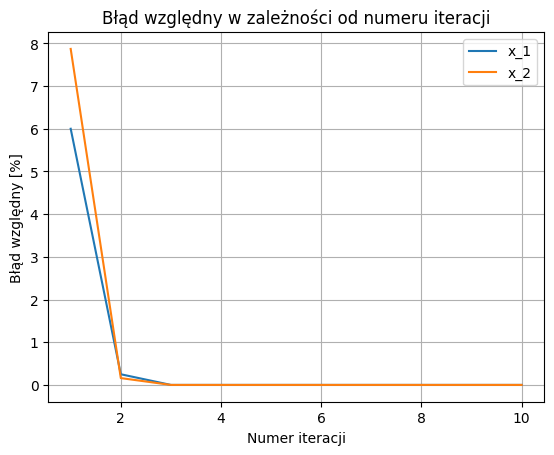

In [9]:
plt.plot(np.arange(1,11), relative_error_df["x_1"], label="x_1")
plt.plot(np.arange(1,11), relative_error_df["x_2"], label="x_2")
plt.grid()
plt.legend()
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd względny [%]")
plt.title("Błąd względny w zależności od numeru iteracji")
plt.show()